In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binom

# Binomial Distribution

Mathematical Framework and variable definitions:
- **n**: number of trials. Each trial has 2 events: **success** or **fail**.
- **k**: number of succeeded trials within the total n of trials.
- **X**: random variable of the number of succeeded trials.
- **p**: percentage of success of each trial.
- **P[X = k]**: probability of a random variable X being equal k.
- **Sample Space = {0, 1, 2, 3, ..., n}**: there are n trials, however the possible values for the random variable X are within the range {0, 1, 2, 3, ..., n} (start from zero, because there is the possibility of not having any succeeded trial).

The formula for the probability P[X = k] is shown below:

\begin{equation*}
P[X = k]   = \frac{n!}{k!(n-k)!} p^k (1-p)^{ n-k}
\end{equation*}

Here we can see an example of a random binomial distribution using **n = 5**, **p = 0.8** and **2000000** (2e6) samples. There were a total of **2000000*5 = 10000000 _trials_**, however this means 2000000 samples drawn from the binomial distribution.

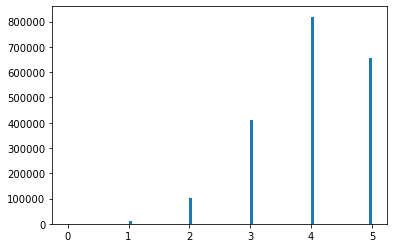

P[X = 0] = 0.00029
P[X = 1] = 0.006333
P[X = 2] = 0.0513475
P[X = 3] = 0.2048995
P[X = 4] = 0.4096885
P[X = 5] = 0.3274415


In [2]:
n, p, n_samples = 5, 0.8, int(2e6)
samples = np.random.binomial(n=n, p=p, size=n_samples)
plt.hist(samples, bins=100)
plt.show()
totals = np.zeros(shape=(n+1))
for k in range(n+1):
    totals[k] = (samples == k).sum()
total = totals.sum()
for k in range(n+1):
    print("P[X = {}] = {}".format(k, totals[k]/total))

Also, we can see the probabilities that resulted from the experiment. Using the formula we can see the expected results below and compare with the experiment results:

In [3]:
k=0
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 0] = 0.00032


\begin{equation*}
P[X = 0]   = \frac{5!}{0!(5-0)!} 0.8^0 (1-0.8)^{ 5-0} = 0.00032
\end{equation*}

In [4]:
k=1
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 1] = 0.0064


\begin{equation*}
P[X = 1]   = \frac{5!}{1!(5-1)!} 0.8^1 (1-0.8)^{ 5-1} = 0.0064
\end{equation*}

In [5]:
k=2
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 2] = 0.0512


\begin{equation*}
P[X = 2]   = \frac{5!}{2!(5-2)!} 0.8^2 (1-0.8)^{ 5-2} = 0.0512
\end{equation*}

In [6]:
k=3
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 3] = 0.2048


\begin{equation*}
P[X = 3]   = \frac{5!}{3!(5-3)!} 0.8^3 (1-0.8)^{ 5-3} = 0.2048
\end{equation*}

In [7]:
k=4
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 4] = 0.4096


\begin{equation*}
P[X = 4]   = \frac{5!}{4!(5-4)!} 0.8^4 (1-0.8)^{ 5-4} = 0.4096
\end{equation*}

In [8]:
k=5
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 5] = 0.32768


\begin{equation*}
P[X = 5]   = \frac{5!}{5!(5-5)!} 0.8^5 (1-0.8)^{ 5-5} = 0.32768
\end{equation*}

# Bernoulli Distribution

The Bernoulli Distribution is a special case of the Binomial Distribution: when **n = 1**. So the sample space is **{0, 1}**.

\begin{equation*}
P[X = k]   = p^k (1-p)^{ 1-k}
\end{equation*}

Here we can see an example of a random Bernoulli distribution using **p = 0.5** (for example a coin toss) and **2000000** (2e6) samples. There were a total of **2000000 _trials_**, which is the number of samples drawn from the distribution.

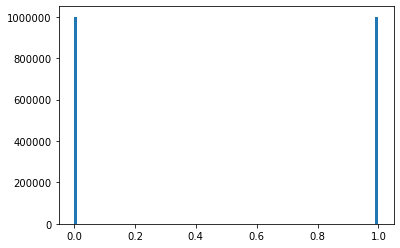

p[X = 0] = 0.500265
p[X = 1] = 0.499735


In [9]:
n, p, n_samples = 1, 0.5, int(2e6)
samples = np.random.binomial(n=n, p=p, size=n_samples)
plt.hist(samples, bins=100)
plt.show()
totals = np.zeros(shape=(n+1))
for k in range(n+1):
    totals[k] = (samples == k).sum()
total = totals.sum()
for k in range(n+1):
    print("p[X = {}] = {}".format(k, totals[k]/total))

In [10]:
k=0
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 0] = 0.5


\begin{equation*}
P[X = 0]   = 0.5^0 (0.5)^{ 1-0} = 0.5
\end{equation*}

In [11]:
k=1
print("P[X = {}] = {}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 1] = 0.5


\begin{equation*}
P[X = 1]   = 0.5^1 (0.5)^{ 1-1} = 0.5
\end{equation*}

# Normal Distribution

In [12]:
mu, sigma = 0, 1
samples = np.random.normal(loc=mu, scale=sigma, size=1000)

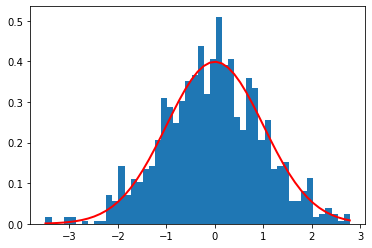

In [13]:
count, bins, ignored = plt.hist(samples, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()